In [1]:
# Reference:
# https://medium.com/the-downlinq/getting-started-with-spacenet-data-827fd2ec9f53
# https://gist.github.com/avanetten/25e642259b81ed598de8fb70a46b754b

In [2]:
import sys
sys.path.append('../../src/features/spacenet_lib')
from geojson_to_pixel_arr import geojson_to_pixel_arr
from create_poly_mask import create_poly_mask

In [3]:
from os import path
from PIL import Image
import numpy as np

from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def plot_building_mask(input_image, pixel_coords, mask_image,   
                  figsize=(8,8), plot_name='',
                  add_title=False, poly_face_color='orange', 
                  poly_edge_color='red', poly_nofill_color='blue', cmap='bwr'):

    '''
    fig, (ax0, ax1, ax2) = plt.subplots(1, 3, 
                                        figsize=(3*figsize[0], figsize[1]))
    '''
    
    fig, (ax0, ax2) = plt.subplots(1, 2, 
                                        figsize=(2*figsize[0], figsize[1]))
    
    if add_title:
        suptitle = fig.suptitle(plot_name.split('/')[-1], fontsize='large')

    # create patches
    patches = []
    patches_nofill = []
    if len(pixel_coords) > 0:
        # get patches    
        for coord in pixel_coords:
            patches_nofill.append(Polygon(coord, facecolor=poly_nofill_color, 
                                          edgecolor=poly_edge_color, lw=3))
            patches.append(Polygon(coord, edgecolor=poly_edge_color, fill=True, 
                                   facecolor=poly_face_color))
        p0 = PatchCollection(patches, alpha=0.25, match_original=True)
        p1 = PatchCollection(patches_nofill, alpha=0.75, match_original=True)
        
    #if len(patches) > 0:
    #    p0 = PatchCollection(patches, alpha=0.25, match_original=True)
    #    #p1 = PatchCollection(patches, alpha=0.75, match_original=True)
    #    p1 = PatchCollection(patches_nofill, alpha=0.75, match_original=True)                   
 
    # ax0: raw image
    ax0.imshow(input_image)
    if len(patches) > 0:
        ax0.add_collection(p0)
    ax0.set_title('Input Image + Ground Truth Buildings') 
    
    '''
    # truth polygons
    zero_arr = np.zeros(input_image.shape[:2])
    # set background to white?
    #zero_arr[zero_arr == 0.0] = np.nan
    ax1.imshow(zero_arr, cmap=cmap)
    if len(patches) > 0:
        ax1.add_collection(p1)
    ax1.set_title('Ground Truth Building Polygons')
    '''
    
    # old method of truth, with mask
    ## ax0: raw imageø
    #ax0.imshow(input_image)
    ## ground truth
    ## set zeros to nan
    #palette = plt.cm.gray
    #palette.set_over('orange', 1.0)
    #z = mask_image.astype(float)
    #z[z==0] = np.nan
    #ax0.imshow(z, cmap=palette, alpha=0.25, 
    #        norm=matplotlib.colors.Normalize(vmin=0.5, vmax=0.9, clip=False))
    #ax0.set_title('Input Image + Ground Truth Buildings') 
   
    # mask
    ax2.imshow(mask_image, cmap=cmap)
    # truth polygons?
    #if len(patches) > 0:
    #    ax1.add_collection(p1)
    ax2.set_title('Ground Truth Building Mask')    
          
    #plt.axis('off')
    plt.tight_layout()
    if add_title:
        suptitle.set_y(0.95)
        fig.subplots_adjust(top=0.96)
    plt.show()
 
    if len(plot_name) > 0:
        plt.savefig(plot_name)
    
    return

In [5]:
def get_filepaths(data_idx):
    # Modify the the paths based on your raster and geojson data location.
    raster_dir = '../../data/processedBuildingLabels/3band'
    geojson_dir = '../../data/processedBuildingLabels/vectordata/geojson/'
    
    raster_filename = '3band_AOI_1_RIO_img{}.tif'.format(data_idx)
    geojson_filename = 'Geo_AOI_1_RIO_img{}.geojson'.format(data_idx)
    
    return path.join(raster_dir, raster_filename), path.join(geojson_dir, geojson_filename)

In [6]:
def get_data(data_idx):
    # Modify the the paths based on your raster and geojson data location.
    raster_dir = '../../data/processedBuildingLabels/3band'
    geojson_dir = '../../data/processedBuildingLabels/vectordata/geojson/'
    
    raster_filename = '3band_AOI_1_RIO_img{}.tif'.format(data_idx)
    geojson_filename = 'Geo_AOI_1_RIO_img{}.geojson'.format(data_idx)
    
    raster_path, geojson_path = path.join(raster_dir, raster_filename),  path.join(geojson_dir, geojson_filename)
    
    # Get input raster as a numpy array
    input_image = Image.open(raster_path)
    input_image = np.array(input_image)
    
    # Get building pixel coords from raster and geojson file
    pixel_coords, _ = geojson_to_pixel_arr(raster_path, geojson_path)
    
    # Create building mask image
    mask_image = create_poly_mask(raster_path, geojson_path, npDistFileName='',  noDataValue=0, burn_values=1)
    
    return input_image, pixel_coords, mask_image

In [7]:
def show(data_idx):
    input_image, pixel_coords, mask_image = get_data(data_idx)
    
    plot_building_mask(input_image, pixel_coords, mask_image)

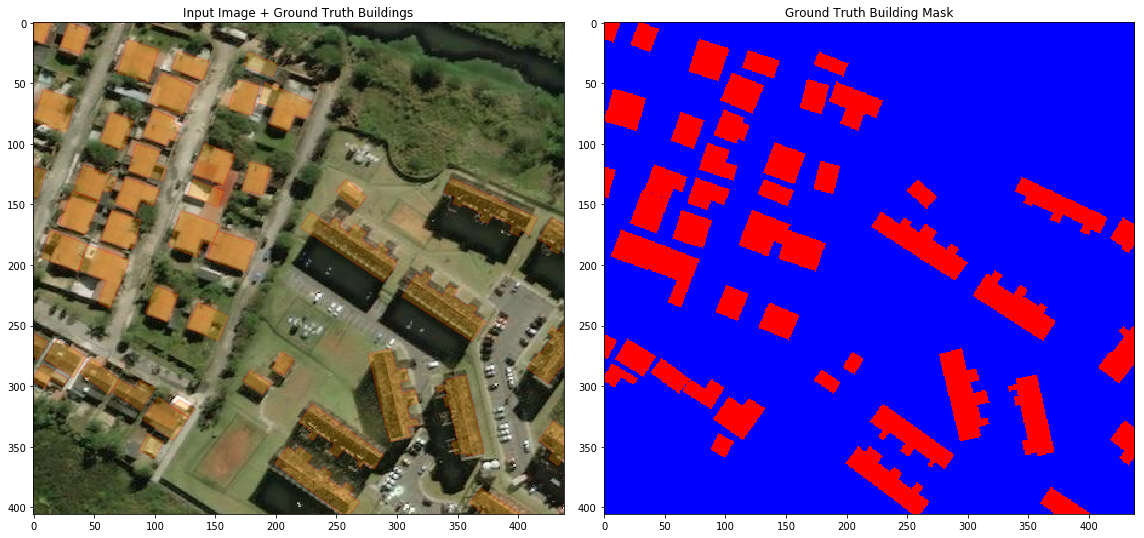

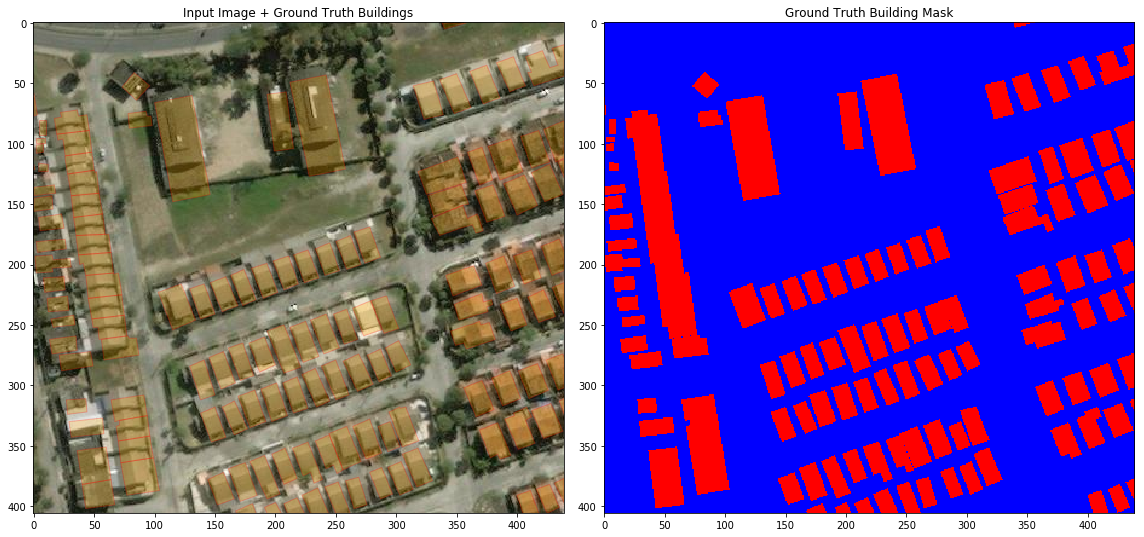

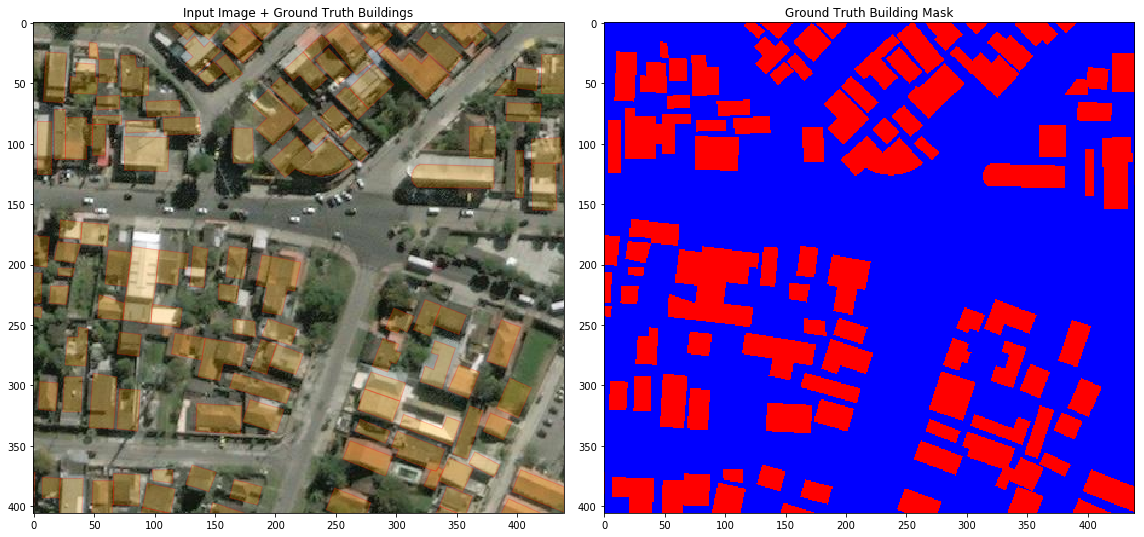

In [8]:
# Show some samples
for idx in [1823, 5865, 6046]:
    show(data_idx=idx)